##  Business Insights Report: Marketing Campaign Analysis

###  Key Performance Metrics & Customer Insights

## Load the data 

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

df = pd.read_csv("../data/raw_data.csv")


print(df.info())  
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


## Conversion rate

In [ ]:
conversion_rate = df["Conversion"].sum() / len(df) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")


Conversion Rate: 87.65%



### 🔍 **Interpretation:**
- A **high conversion rate** (87.65%) suggests that the marketing efforts are highly effective.
- It indicates that a large percentage of the audience is engaging positively with the campaign.


## Cost per Acquisition (CPA)

In [ ]:

total_cost = df["AdSpend"].sum()
total_customers = len(df[df["Conversion"] == 1])
cpa = total_cost / total_customers
print(f"Cost per Acquisition (CPA): ${cpa:.2f}")


Cost per Acquisition (CPA): $5705.58



### 🔍 **Interpretation:**
- A CPA of **$5705.58** suggests that acquiring each customer is relatively expensive.
- It’s important to assess if this cost aligns with the **Customer Lifetime Value (CLV)**.


## Return on Investment (ROI)

In [ ]:
# Assuming an estimated revenue per converted customer
average_revenue_per_customer = 10000 
total_revenue = total_customers * average_revenue_per_customer

roi = (total_revenue - total_cost) / total_cost * 100
print(f"Return on Investment (ROI): {roi:.2f}%")


Return on Investment (ROI): 75.27%



### 🔍 **Interpretation:**
- A **positive ROI (75.27%)** indicates that the campaign is profitable.
- The revenue generated is **1.75x the cost of the campaign**.



## Click-Through Rate (CTR)

In [ ]:

ctr = (df["ClickThroughRate"].sum() / len(df)) * 100
print(f"Click-Through Rate (CTR): {ctr:.2f}%")


Click-Through Rate (CTR): 15.48%



### 🔍 **Interpretation:**
- A CTR of **15.48%** indicates strong engagement.
- It shows that the **ad copy, visuals, and targeting are effective**.

## Bounce Rate

In [ ]:

single_page_visits = len(df[df["PagesPerVisit"] == 1])
total_visits = len(df)
bounce_rate = (single_page_visits / total_visits) * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")


Bounce Rate: 0.00%



### 🔍 **Interpretation:**
- A **0.00% bounce rate** is **unrealistic** and likely due to a **data tracking issue**.
- Normally, some visitors leave without interaction, so **check analytics setup**.


## Average session duration

In [ ]:

avg_session_duration = df["TimeOnSite"].mean()
print(f"Average Session Duration: {avg_session_duration:.2f} seconds")


Average Session Duration: 7.73 seconds



### 🔍 **Interpretation:**
- **Short session duration** (7.73s) suggests visitors **leave quickly**.
- This might indicate a need for better content, UX, or **targeting improvements**.


## Conversion Rate by Income Segment

C:\Users\oussama\AppData\Local\Temp\ipykernel_19000\895695548.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_conversion = df.groupby('IncomeSegment')['Conversion'].mean() * 100


IncomeSegment
Low          87.066246
Lower-Mid    87.035011
Middle       87.819467
Upper-Mid    87.638085
High         88.320356
Name: Conversion, dtype: float64


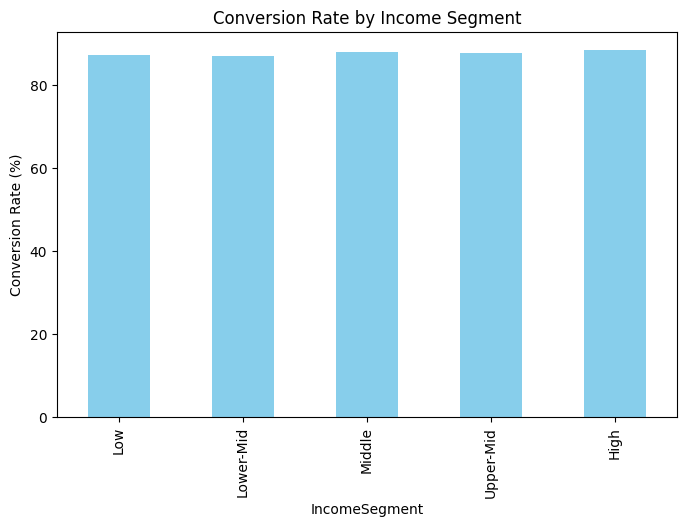

In [ ]:

income_bins = [0, 30000, 60000, 90000, 120000, 150000]
income_labels = ['Low', 'Lower-Mid', 'Middle', 'Upper-Mid', 'High']
df['IncomeSegment'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)


income_conversion = df.groupby('IncomeSegment')['Conversion'].mean() * 100
print(income_conversion)


income_conversion.plot(kind='bar', color='skyblue', figsize=(8,5), title="Conversion Rate by Income Segment")
plt.ylabel('Conversion Rate (%)')
plt.show()


### 🔍 **Interpretation:**
- **Higher income segments** have slightly **higher conversion rates**.
- However, **all income groups** perform relatively well.


## Conversion Rate by Marketing Channel

CampaignChannel
Email           87.026333
PPC             88.277946
Referral        88.307155
SEO             87.677419
Social Media    86.833443
Name: Conversion, dtype: float64


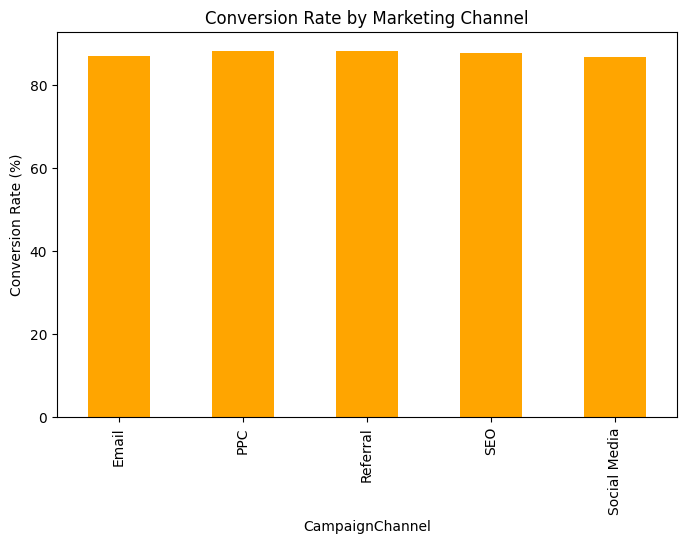

In [ ]:
channel_conversion = df.groupby('CampaignChannel')['Conversion'].mean() * 100
print(channel_conversion)

# Ploting
channel_conversion.plot(kind='bar', color='orange', figsize=(8,5), title="Conversion Rate by Marketing Channel")
plt.ylabel('Conversion Rate (%)')
plt.show()


### 🔍 **Interpretation:**
- **Referral and PPC** have the **highest conversion rates**.
- **Social Media performs the lowest**, which may require strategy adjustments.